<h1 style="text-align:center; color:purple">House price prediction using Linear regression</h1>

<h2 style="text-align:center; color:pink">Presentation</h2>

<center>
    In this project, I will use linear regression to predict the price of a house based on the house's features. I will use images to add notes in the notebook.
</center>

<h2>1 - Installations and Imports</h2>

In [83]:
%%capture
!pip3 install numpy
!pip3 install matplotlib
!pip3 install pandas
!pip3 install scipy
from scipy.stats import norm
from IPython.display import Image, display

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
%matplotlib inline

<h2>2 - Load dataset inside the file</h2>

To load the data I used the library "pandas", the data is in a csv file named "dataset-houseprice2.csv" you can find it in the project folder at "HousePricePredictionLinearRegression/dataset-houseprice2.csv".

In [85]:
# Load data
data = pd.read_csv('dataset-houseprice2.csv')

In [86]:
# Visualize data
data.head()

,price,bedrooms,bathrooms,sqft,floors,condition,grade,yr_built
0,221900.0,3,1.00,1180,1.0,3,7,1955
1,538000.0,3,2.25,2570,2.0,3,7,1951
2,180000.0,2,1.00,770,1.0,3,6,1933
3,604000.0,4,3.00,1960,1.0,5,7,1965
4,510000.0,3,2.00,1680,1.0,3,8,1987


<h2>3 - Visualize the data</h2>

In [87]:
# Take the dataset and drop the "Price" variable so we can load the "inputs" data inside the variable "X_train"
X_train = data.drop(columns=['price']).values.tolist()
X_features = ['bedrooms', 'bathrooms', 'sqft', 'floors', 'condition', 'grade', 'yr_built']
# Convert into a numpy array so we can work with the data
X_train = np.array(X_train)
print(X_train)

[[3.000e+00 1.000e+00 1.180e+03 ... 3.000e+00 7.000e+00 1.955e+03]
 [3.000e+00 2.250e+00 2.570e+03 ... 3.000e+00 7.000e+00 1.951e+03]
 [2.000e+00 1.000e+00 7.700e+02 ... 3.000e+00 6.000e+00 1.933e+03]
 ...
 [3.000e+00 2.000e+00 2.330e+03 ... 3.000e+00 7.000e+00 1.986e+03]
 [4.000e+00 3.000e+00 2.170e+03 ... 3.000e+00 8.000e+00 1.997e+03]
 [3.000e+00 2.000e+00 1.760e+03 ... 4.000e+00 7.000e+00 1.943e+03]]


In [88]:
# Load the "targets" data inside the "y_train" variable
y_train = data['price']
# Convert into a numpy array so we can work with the data
y_train = np.array(y_train)

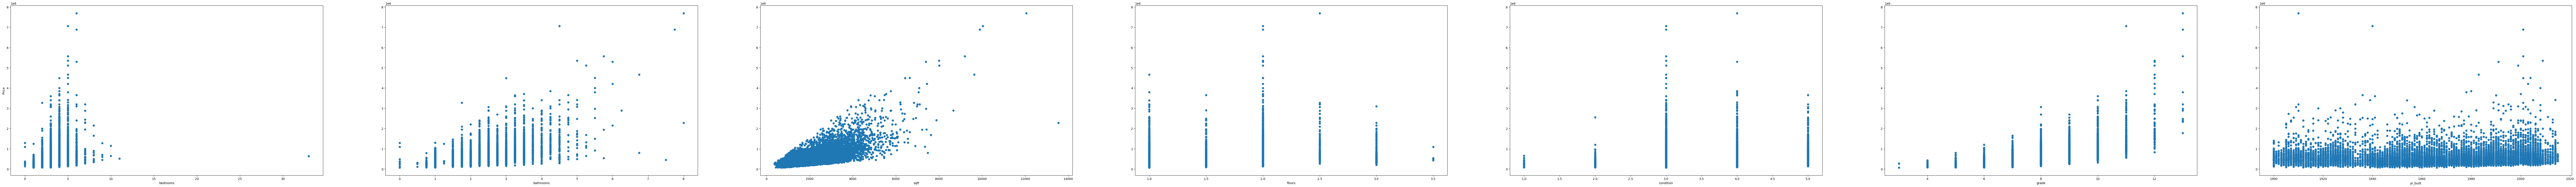

In [89]:
# Visualize the dataset by plotting each features versus the price 
fig, ax = plt.subplots(1, 7, figsize=(150, 10), sharey=False)
for i in range(len(ax)):
    ax[i].scatter([x[i] for x in X_train], y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price")
plt.show()

These 7 graphs represents the dataset features (x-axis) versus the price (y-axis).

<h2>4 - The model</h2>

In supervised machine learning, the algorithm learns to create a reasonably accurate prediction of the 'target' by observing correct pairs of 'input' and the desired 'target' (output).

In our case it is by seeing correct pairs of house's features (bedrooms, bathrooms, sqft, floors, condition, grade, yr_built) and the price associated with it that the algorithm will learn to predict an accurate price when we give it some house's features.

The model we will use to predict the house's prices will be a function. Indeed, the input of this function is going to be the house's features and the output of this function will be the price.

Let's see how our function is going to be. (See image I did down below)

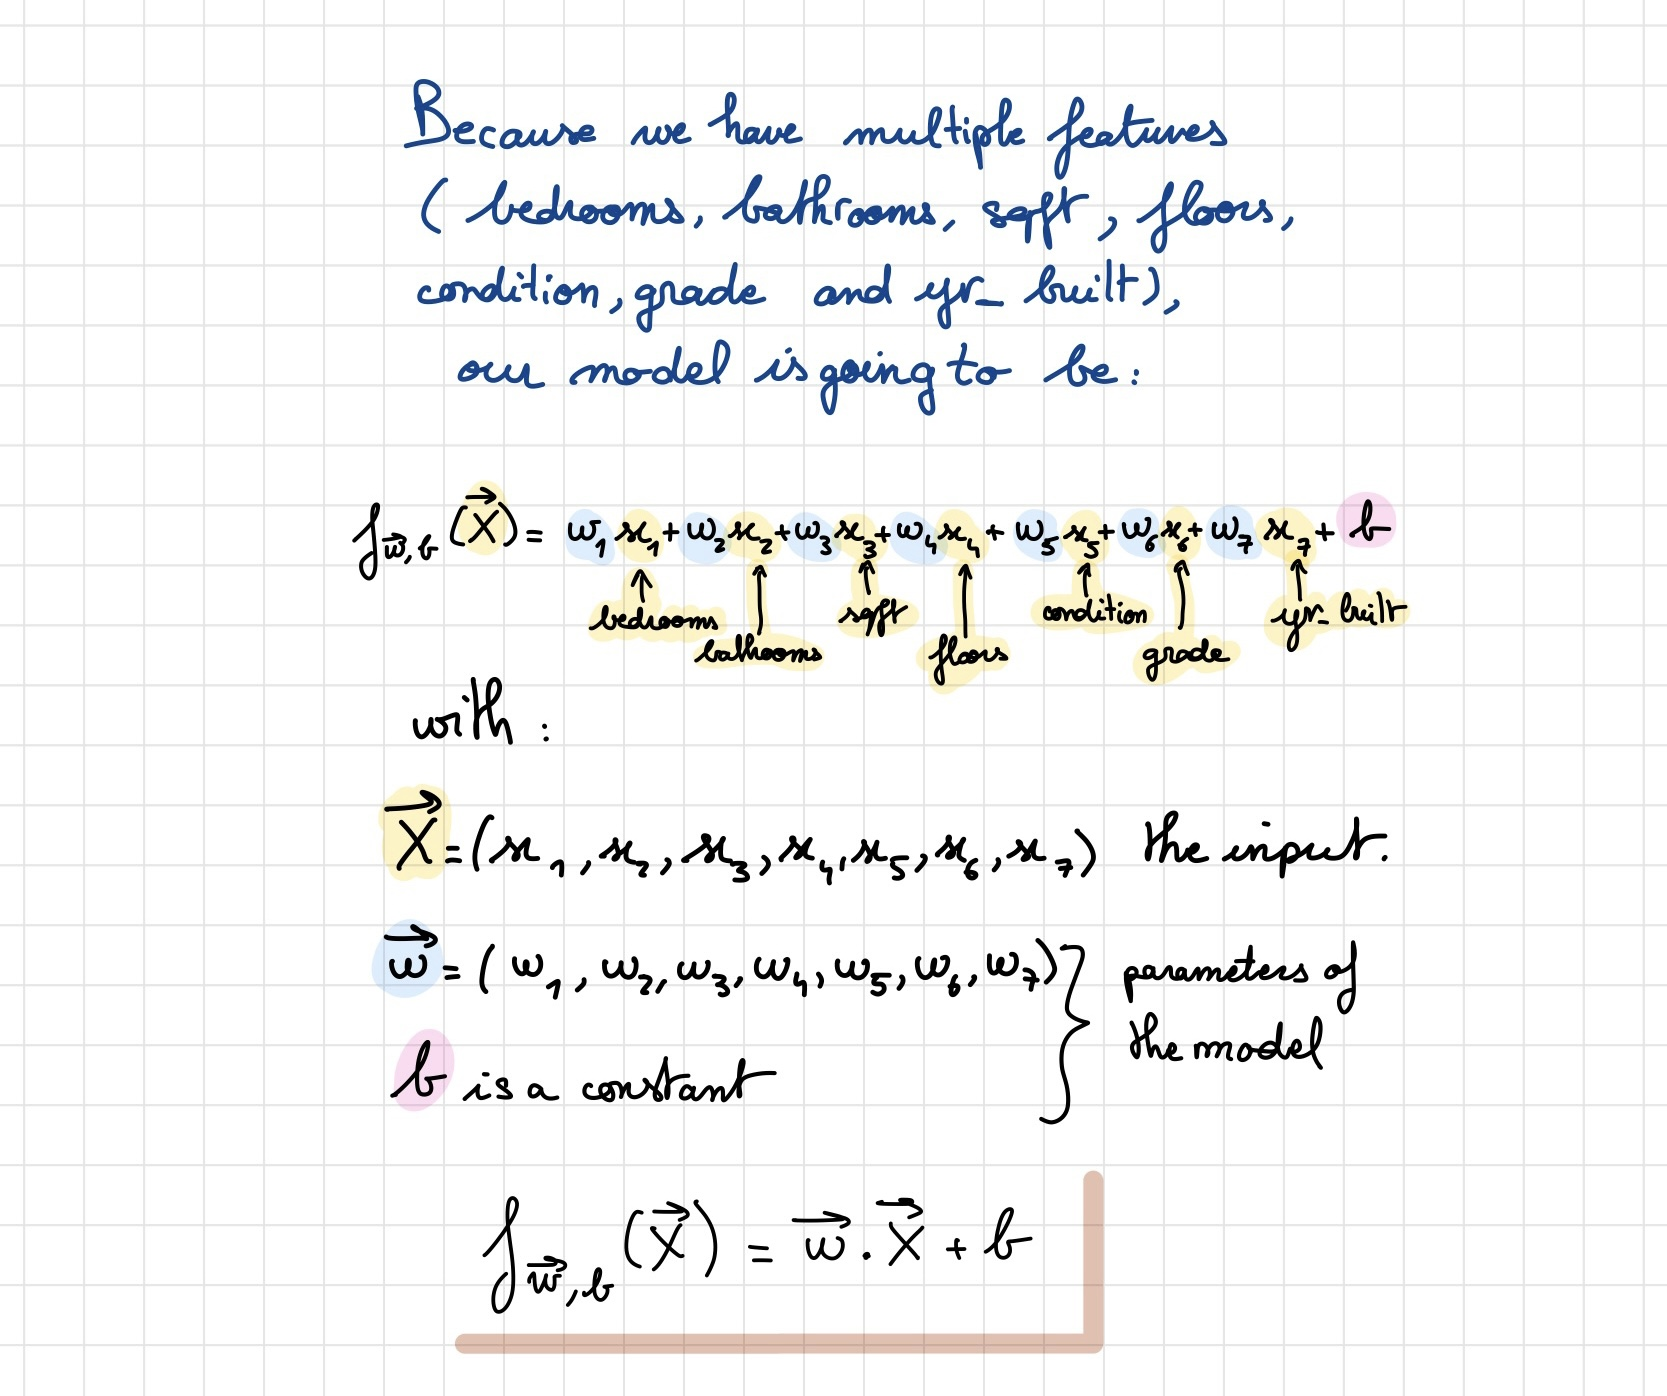

In [90]:
# Display the image "Note-1.png"
display(Image(filename='Note-1.png'))

<h2>5 - The cost function</h2>

To have our function that will predict the houses' price , we  need to find the function's parameters: the vector w and the constant b.
However, we need to find w and b so the predicted 'target' is close to the actual 'target' for all pairs ('input', 'target').

To measre that we use the Cost function.

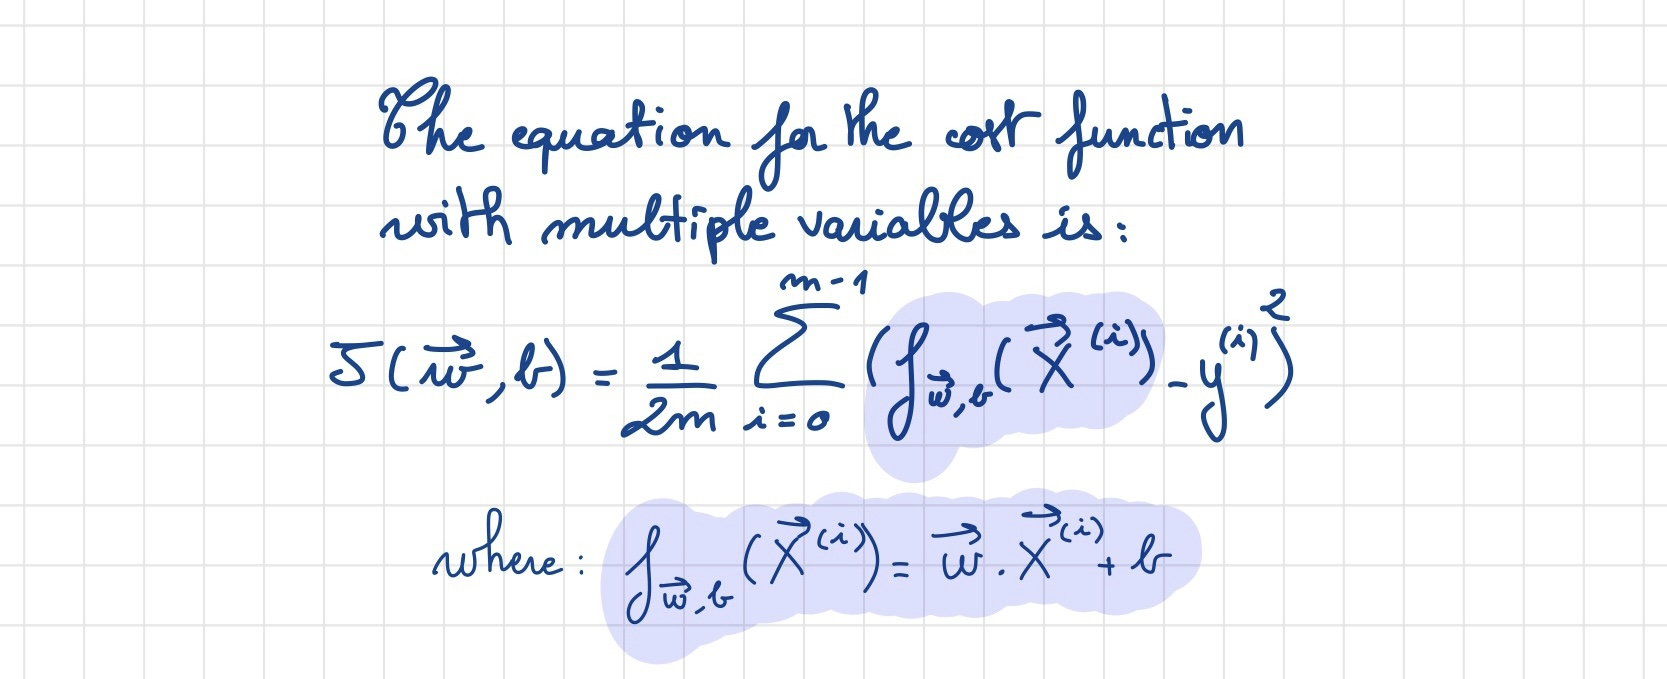

In [91]:
# Display the image "Note-2.png"
display(Image(filename='Note-2.png'))

The cost function measures the difference between the predicted 'target' and the actual 'target.' So, the closer the cost function is to 0, the better our model is.

<h3>Cost function in Python:</h3>

In [181]:
def cost_function(X, y, w, b):
    """
    arguments:
      X : Matrix of the 'inputs' data of size n,m
      y : List of the 'targets' data of lenght m
      w : Vector w of size p (parameters for prediction)
      b : Scalar b for prediction

    return: cost : Return the cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    cost = cost / (2 * m)
    return cost

<h2>5 - Gradient descent</h2>

To find the parameters w and b that will give us the smallest possible cost Jwe will use the gradient descent alogorithm.
Let's first see how gradient descent works.

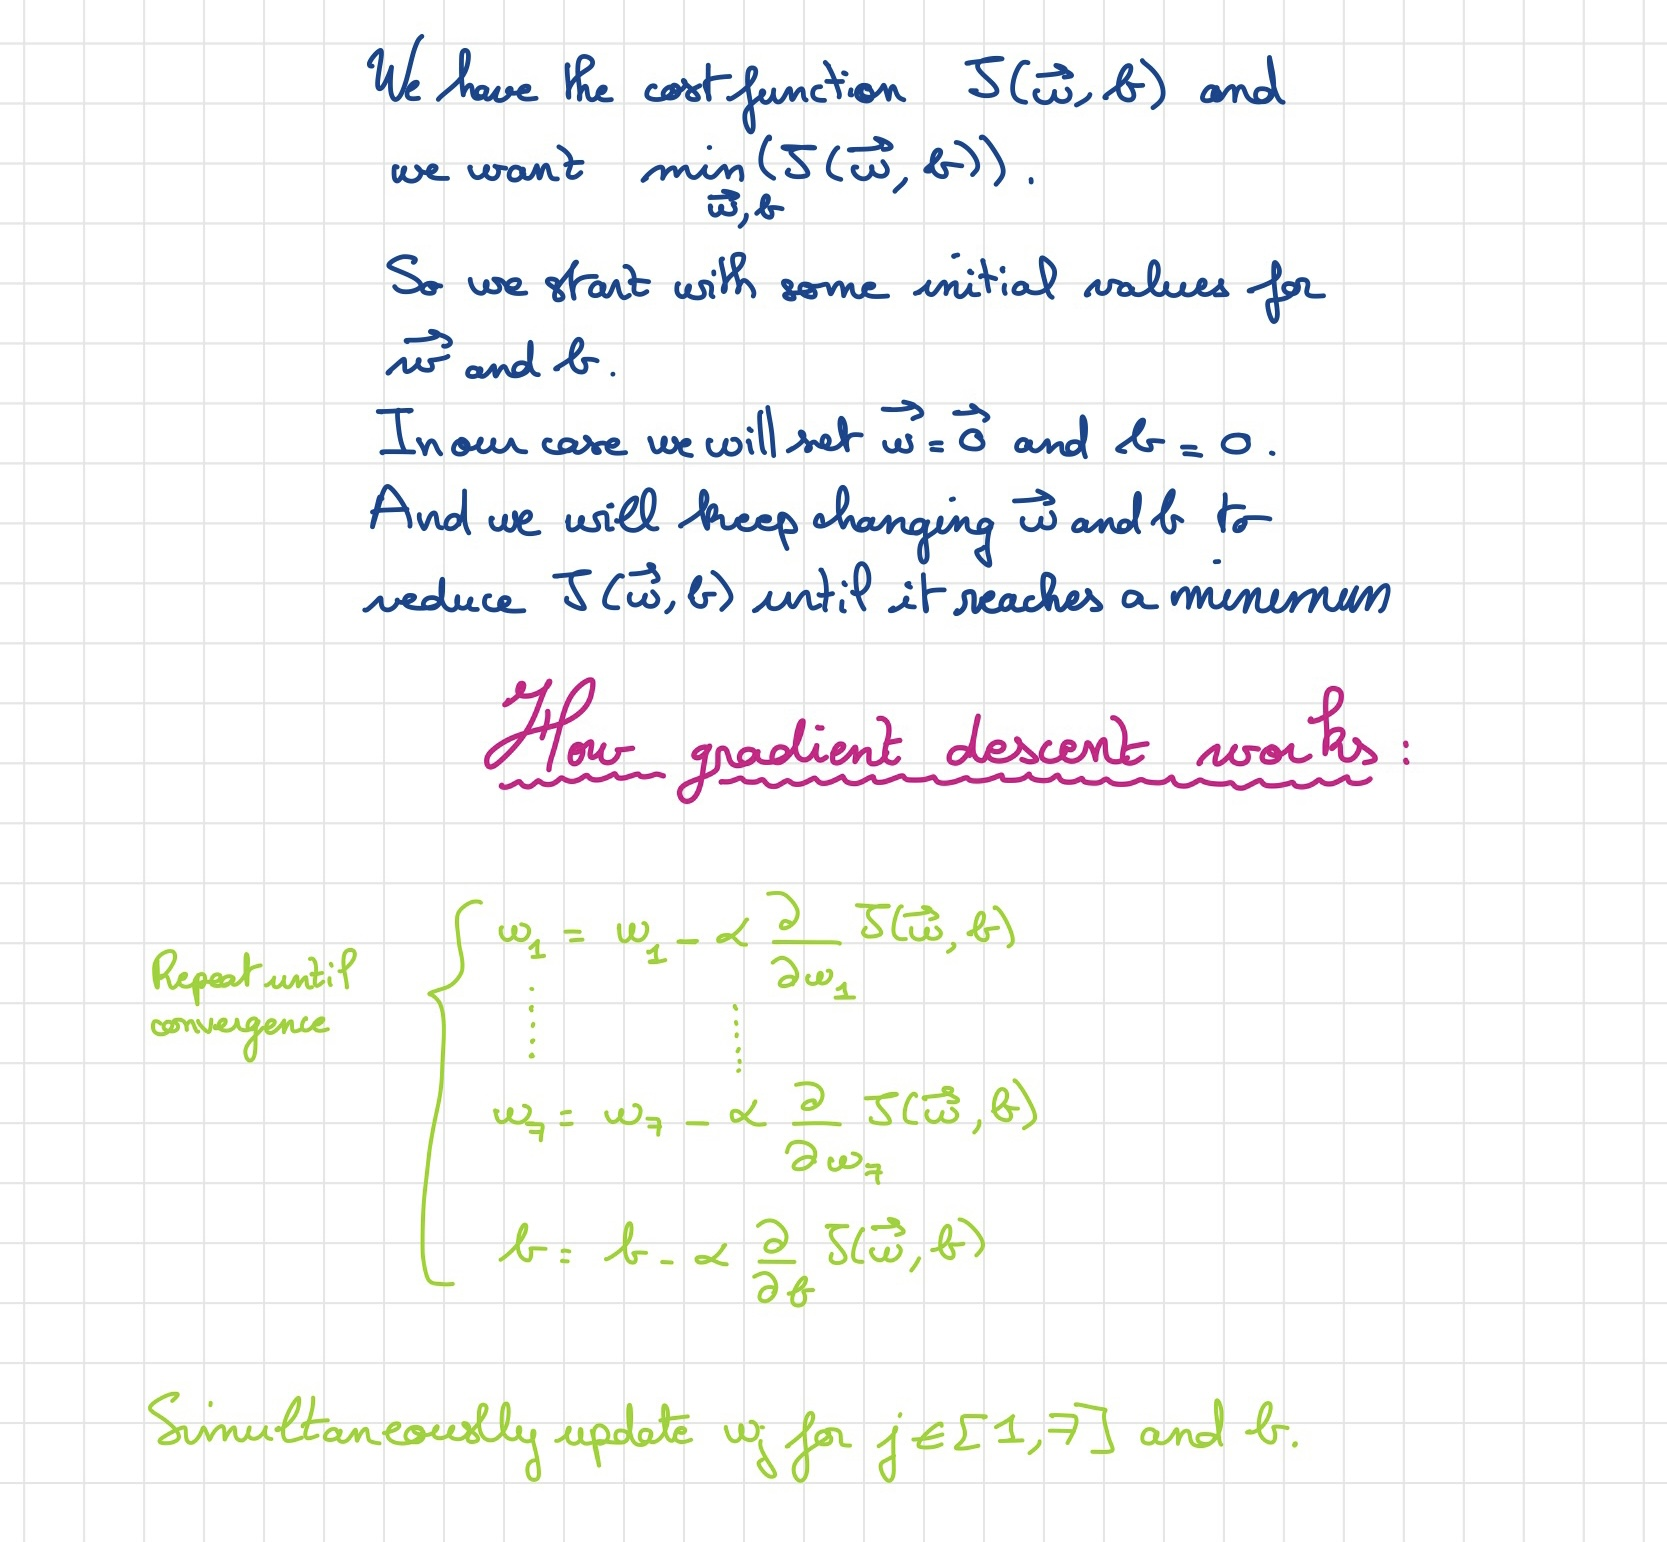

In [182]:
# Display the image "Note-3.png"
display(Image(filename='Note-3.png'))

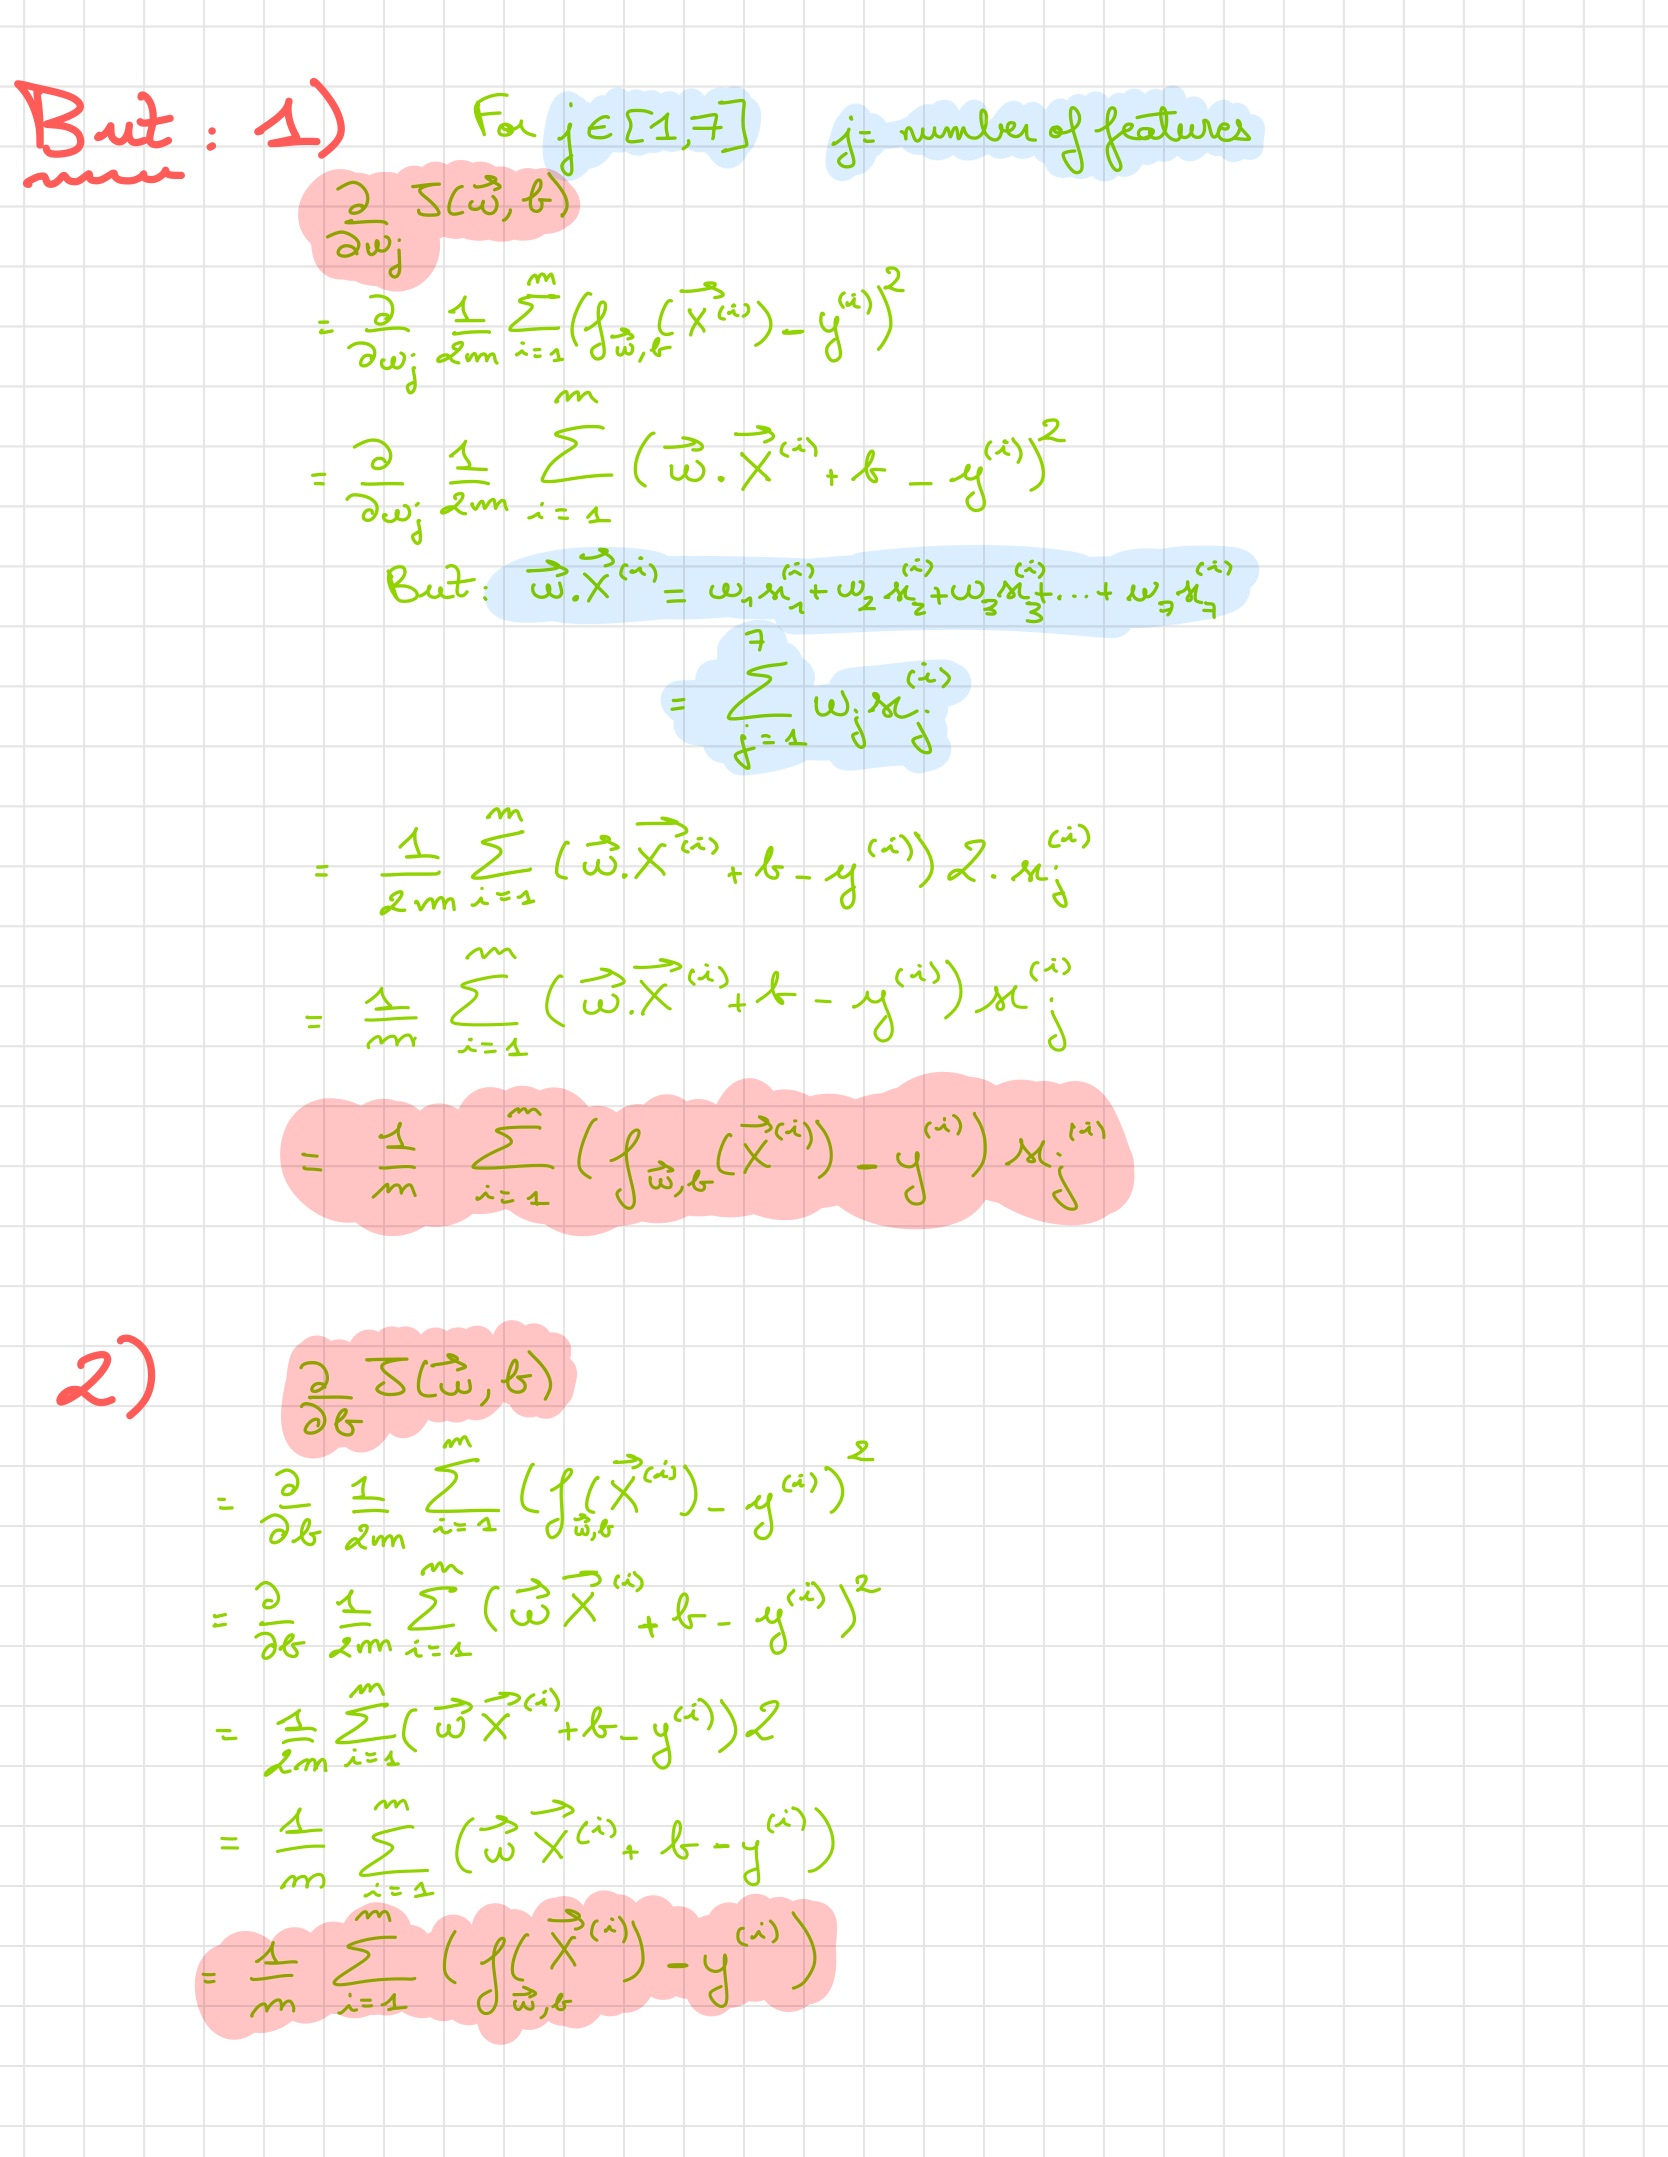

In [183]:
# Display the image "Note-4.png"
display(Image(filename='Note-4.png'))

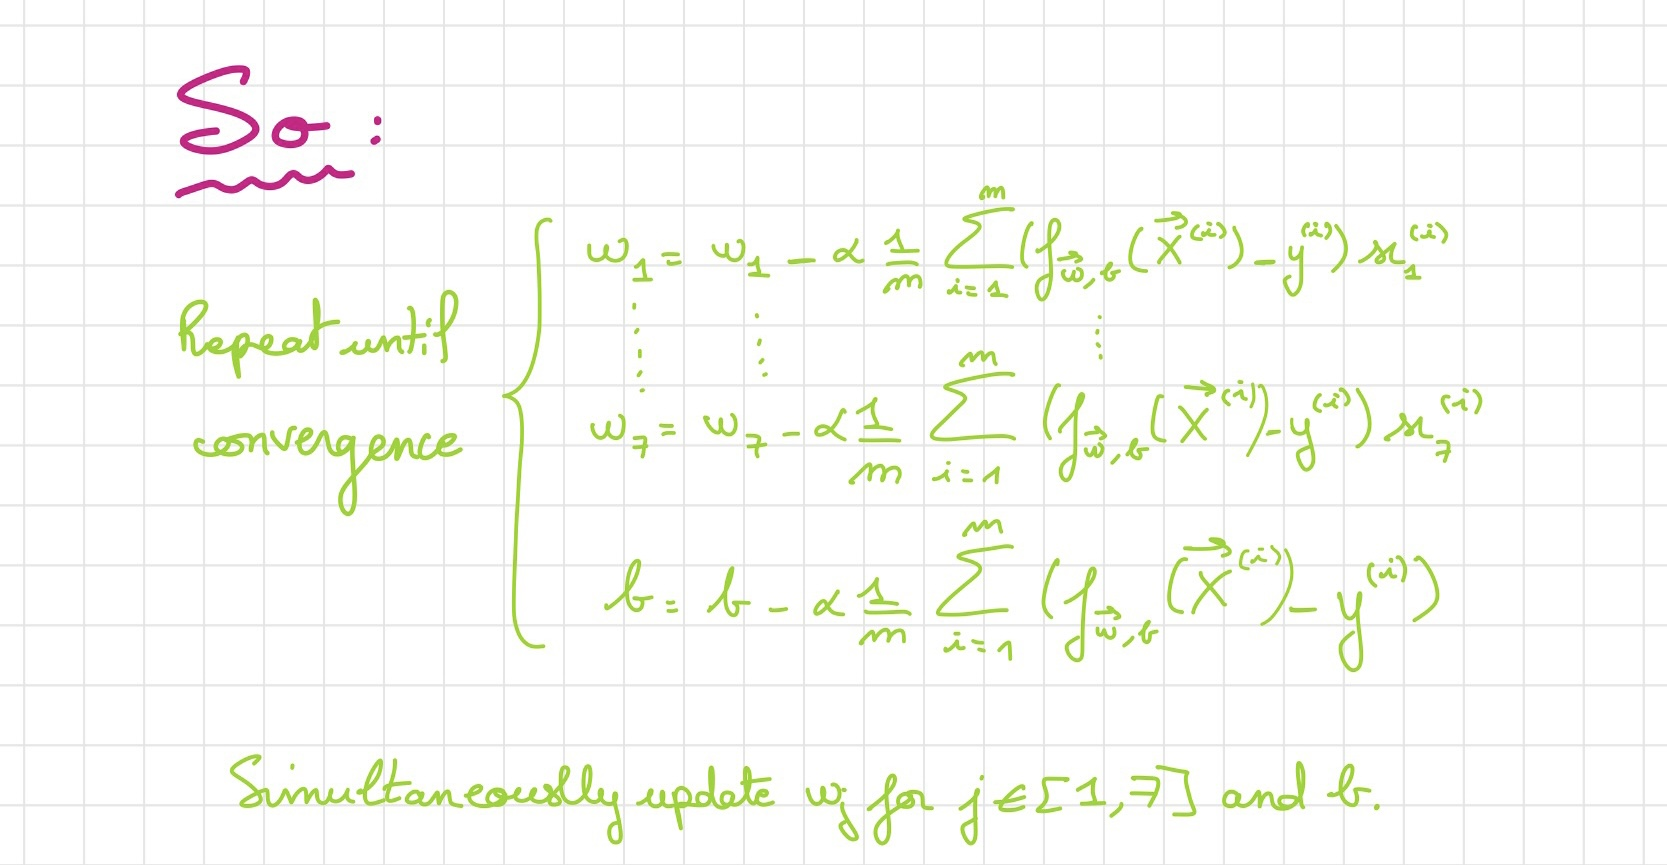

In [184]:
# Display the image "Note-5.png"
display(Image(filename='Note-5.png'))

<h3>Python implementation of gradient descent:</h3>

In [255]:
def gradient_descent(X, y, cost_function, alpha, iterations):
    """
    
    arguments:
      X : Matrix of the 'inputs' data of size n,m
      y : List of the 'targets' data of lenght m
      alpha : Learning rate
      iterations : number of iterations to run gradient descent

    return: 
        w : Updated values of w of the model after running gradient descent
        b : Updated value of b of the model after running gradient descent
        store: Updated dictionnary used for visualisation
        
    """
    
    m,n = X.shape
    
    w = np.zeros(n)
    b = 0

    # A dictionnary to store values at each iteration for visualization
    store={}
    #Store the cost values at each iteration..
    store["cost"] = [];
    #Store parameter values at each iteration.
    store["parameters"] = [];
    #Store gradient values at each iteration.
    store["gradients"]=[];
    #Store the iteration number at each iteration.
    store["iterations"]=[];

    #Control how often data is saved or recorded during the gradient descent process
    save_interval = np.ceil(iterations/10000)

    print(f"Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  ")
    print(f"---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|")

    for iteration in range(iterations):
        
        # Calculate the gradient and update the parameters
        #dj_db,dj_dw = gradient_function(X, y, w, b)   

        dj_dw = np.zeros((n,))
        dj_db = 0.

        for i in range(m):                             
            err = (np.dot(X[i], w) + b) - y[i]   
            for j in range(n):                         
                dj_dw[j] = dj_dw[j] + err * X[i,j]    
            dj_db = dj_db + err                        
        dj_dw = dj_dw/m                                
        dj_db = dj_db/m

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db

        #Control when to save data during the gradient descent process so we collect data at 
        #regular intervals without saving it for every single iteration which is computationally expensive.
        if iteration == 0 or iteration % save_interval == 0:     
            store["cost"].append(cost_function(X, y, w, b))
            store["parameters"].append([w,b])
            store["gradients"].append([dj_dw,dj_db])
            store["iterations"].append(iteration)

        # Print cost every at intervals 20 times or as many iterations if < 20
        if iteration% math.ceil(iterations/20) == 0:
            #print(f"Iteration {i:4d}: Cost {cost_function(X, y, w, b):8.2f}   ")
            cst = cost_function(X, y, w, b)
            print(f"{iteration:9d} {cst:0.5e} {w[0]: 0.1e} {w[1]: 0.1e} {w[2]: 0.1e} {w[3]: 0.1e} {b: 0.1e} {dj_dw[0]: 0.1e} {dj_dw[1]: 0.1e} {dj_dw[2]: 0.1e} {dj_dw[3]: 0.1e} {dj_db: 0.1e}")


    print(f"w,b found by gradient descent: w: {w}, b: {b:0.2f}")
       
    return w, b, store

In [256]:
w, b, store = gradient_descent(X_train, y_train, cost_function, alpha=1.2e-7, iterations=500)

Iteration   Cost         w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.15167e+10  2.3e-01  1.5e-01  1.6e+02  9.8e-02  6.4e-02 -1.9e+06 -1.2e+06 -1.3e+09 -8.2e+05 -5.3e+05
       25 3.49010e+10  6.8e-02  1.5e-01  2.4e+02  6.6e-02  1.3e-02  4.2e+04 -1.9e+02 -1.6e+07  5.2e+03  8.8e+03
       50 3.41997e+10 -4.4e-02  1.5e-01  2.7e+02  5.7e-02 -1.6e-03  3.4e+04  1.7e+03 -5.4e+06  1.2e+03  2.2e+03
       75 3.41242e+10 -1.4e-01  1.4e-01  2.8e+02  5.6e-02 -4.3e-03  3.2e+04  2.3e+03 -1.8e+06 -1.6e+02  5.7e+01
      100 3.41160e+10 -2.4e-01  1.4e-01  2.9e+02  5.8e-02 -3.1e-03  3.1e+04  2.5e+03 -5.8e+05 -6.0e+02 -6.5e+02
      125 3.41151e+10 -3.3e-01  1.3e-01  2.9e+02  6.0e-02 -7.6e-04  3.1e+04  2.6e+03 -1.9e+05 -7.4e+02 -8.8e+02
      150 3.41150e+10 -4.2e-01  1.2e-01  2.9e+02  6.2e-02  2.0e-03  3.0e+04  2.6e+03 -6.2e+04 -7.9e+02 

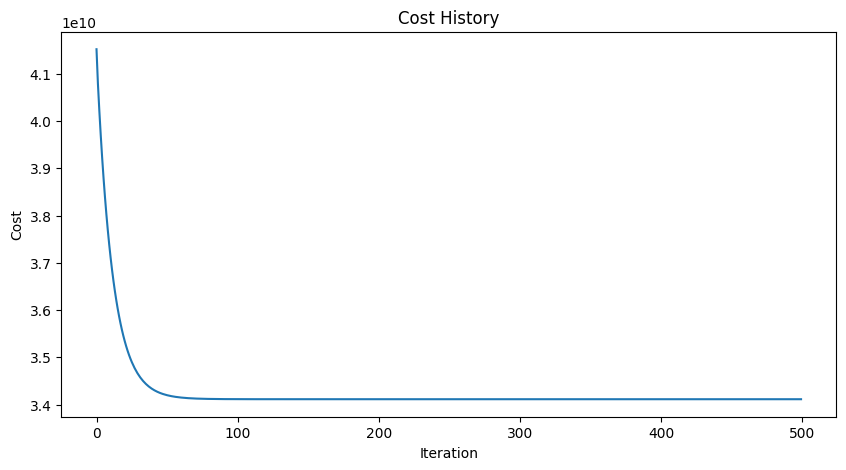

In [257]:
# Extract cost history from the hist dictionary
cost_history = hist["cost"]

plt.figure(figsize=(10, 5))

# Create a plot of the cost history
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost History")

plt.show()